## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

This project will perform and interpret an A/B test and its results run by an e-commerce website.  The goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
df.query('converted == 1').user_id.nunique() / df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index).copy()

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(2893, axis=0, inplace=True)
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df_cont = df2.query('group == "control"')
df_cont.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df_treat = df2.query('group == "treatment"')
df_treat.converted.mean()

0.11880806551510564

In [18]:
obs_diff = df_treat.converted.mean() - df_cont.converted.mean()
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [19]:
df2.query('landing_page == "new_page"').user_id.count() / df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

- Overall conversion rate = 11.960%
- Control group conversion rate = 12.039%
- Treatment group conversion rate = 11.881%
- Observed differance = 0.01%

That being said, the conversion rate is very similar between the treatment and control group, as well as the overall conversion rate. Thus, there is no sufficient evidence that the new treatment will lead to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
$$ H_0: p_{new} - p_{old} <= 0 $$
$$ H_1: p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df_treat.shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df_cont.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1, p_new, n_new)
sim_treat = new_page_converted.mean()
sim_treat

0.1201706696029179

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1, p_old, n_old)
sim_cont = old_page_converted.mean()
sim_cont

0.1187617880694412

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
sim_diff = sim_treat - sim_cont
sim_diff

0.001408881533476708

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.binomial(1, p_old, n_old)
    sim_cont_b = new_page_converted.mean()
    new_page_converted = np.random.binomial(1, p_new, n_new)
    sim_treat_b = old_page_converted.mean()
    p_diffs.append(sim_treat_b - sim_cont_b)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

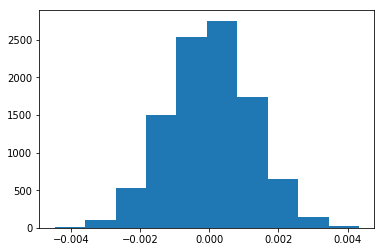

In [28]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

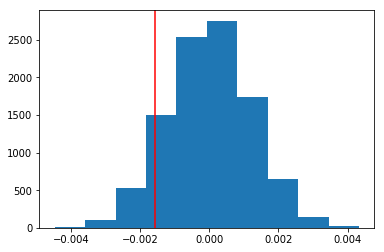

In [29]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color='red');

In [30]:
p_value = (p_diffs > obs_diff).mean()
p_value

0.90490000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

We just calculated the p-value, that is equal to 90.63%, and the smallest level of significance at which the null hypothesis would be rejected is 5%, hence, we fail to reject the null. Which means the old page has the same or higher conversion rate that the new one.

The p-Value can be defined as the probability of observing our statistic or a more extreme statistic from the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df_cont.shape[0]
n_new = df_treat.shape[0]
convert_old, convert_new, n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

- z_score represents how many standard deviations away from the mean the conversion rate is, we have a z-score of 1.31, meaning the value is between the 1st and 2nd standard deviations (the 1st contains ~68% of all elements and the the 2nd contains ~95% of all elements).
- With a p-value of 0.9051 > 0.05, we fail to reject the null. Which means the old page has the same or higher conversion rate that the new one.
- Yes this p_value is almost the same as the previous (one with the ztest it is 0.9051 and with the simulation it was 0.9063) and the findings agree with the one in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic Regression, since the conversion rate is a categorical dependent variable.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df3 = df2.copy()
df3.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [34]:
df3[['group_1', 'group_2' ]] = pd.get_dummies(df2.group)
df3[['lp1', 'lp2' ]] = pd.get_dummies(df2.landing_page)
df3 = df3.rename(columns={'group_2': 'ab_page', 'lp1': 'treatment'})
df3 = df3.drop(['timestamp','group', 'landing_page', 'lp2', 'group_1', 'treatment'], axis=1)
df3.head()

,user_id,converted,ab_page
0,851104,0,0
1,804228,0,0
2,661590,0,1
3,853541,0,1
4,864975,1,0


In [35]:
df3['intercept'] = 1
df3.head()

,user_id,converted,ab_page,intercept
0,851104,0,0,1
1,804228,0,0,1
2,661590,0,1,1
3,853541,0,1,1
4,864975,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        17:32:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [38]:
np.exp(-1.9888), np.exp(-0.0150)

(0.13685955841614492, 0.98511193960306265)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**Put your answer here.**

p-value = 0.19
- In part II the p-values were 0.9051 and 0.9063, in part III it is 0.19, and the reason behinde that is because here it focuses on two sides instead one like in part II.
- The p-value is much less, meaning the new_page has a higher conversion rate than the old_page.
- We can equivalence the p-values as follows, (1 - (0.19/2) = 0.905, which is the same or very close to what we calculated in part II.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

- One thing to consider is the timing of visiting, usually the time has a big impact on how things may go and may have correlations with the conversion rates. Also, we can divide timestamps into categories like "Morning, afternoon, evening" or "weekdays and weekends".
- It's good to consider other factors because sometimes other factors may correlate in a more clear way than the factor you're putting under test, or maybe they are dependent on the factors under test.
- A disadvantage can be the added complexity in interpretation that may come along with adding those extra correlated factors.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
cdf = pd.read_csv('countries.csv')
cdf.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
cdf2 = df3.merge(cdf, on='user_id', how='inner')
cdf2.head()

,user_id,converted,ab_page,intercept,country
0,851104,0,0,1,US
1,804228,0,0,1,US
2,661590,0,1,1,US
3,853541,0,1,1,US
4,864975,1,0,1,US


In [41]:
cdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 5 columns):
user_id      290584 non-null int64
converted    290584 non-null int64
ab_page      290584 non-null uint8
intercept    290584 non-null int64
country      290584 non-null object
dtypes: int64(3), object(1), uint8(1)
memory usage: 11.4+ MB


In [42]:
cdf2.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [43]:
cdf2[['CA', 'UK', 'US']] = pd.get_dummies(cdf2['country'])
cdf2 = cdf2.drop(['country', 'CA'], axis=1)
cdf2.head()

,user_id,converted,ab_page,intercept,UK,US
0,851104,0,0,1,0,1
1,804228,0,0,1,0,1
2,661590,0,1,1,0,1
3,853541,0,1,1,0,1
4,864975,1,0,1,0,1


In [44]:
log_mod = sm.Logit(cdf2['converted'], cdf2[['intercept', 'ab_page', 'UK', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 May 2019   Pseudo R-squ.:               2.323e-05
Time:                        17:32:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [45]:
1/np.exp(-0.0150),np.exp(0.0506),np.exp(0.0408)

(1.0151130646157189, 1.0519020483004984, 1.0416437559600236)

Interpreting Result:

- For every unit for new_page decrease, conversion is 1.5% more likely to happen, holding all other variables constant.
- For every unit for UK increase, conversion is 5.2% more likely to happen, holding all other variables constant.
- For every unit for US increase, conversion is 4.2% likely to happen, holding all other variables constant.

All p-values are above 5%, meaning we fail to reject the null.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
int_df = cdf2.copy()
int_df['UK_ab_page'] = int_df['UK'] * int_df['ab_page']
int_df['US_ab_page'] = int_df['US'] * int_df['ab_page']
int_df.head()

,user_id,converted,ab_page,intercept,UK,US,UK_ab_page,US_ab_page
0,851104,0,0,1,0,1,0,0
1,804228,0,0,1,0,1,0,0
2,661590,0,1,1,0,1,0,1
3,853541,0,1,1,0,1,0,1
4,864975,1,0,1,0,1,0,0


In [53]:
log_mod = sm.Logit(int_df['converted'], int_df[['intercept','ab_page','UK_ab_page','US_ab_page','UK','US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        17:42:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
==============================================================================
"""

In [54]:
# exponentiate to inteprete the result
np.exp(results.params)

intercept     0.134794
ab_page       0.934776
UK_ab_page    1.081428
US_ab_page    1.048001
UK            1.011854
US            1.017682
dtype: float64

Interpreting Result:


- None of the p-values are significant.
- None of the z-scores are large enough to predict conversion rate.

Hence, the country for the user does not appear to be significant on the conversion rate.

- For every unit for new_page decrease, conversion is 6.5% more likely to happen, holding all other variables constant.
- For every unit for UK user with the new_page increase, conversion is 8.1% more likely to happen compared to CA user with the new_page, holding all other variables constant. 
- For every unit for US user with the new_page increase, conversion is 4.8% more likely to happen compared to CA user with the new_page, holding all other variables constant. 
- For every unit for UK user, conversion is 1.2% more likely to happen compared to CA user, holding all other variables constant.
- For every unit for US user, conversion is 1.77% more likely to happen compared to CA user, holding all other variables constant.

<a id='conclusion'></a>
### Conclusion

Based on our findings in simulatons, logistical regression models and z_tests the results seem to be not significant. The p_values in all cases were not signficant. Hence, we fail to reject the null hypothesis. Meaning the old_page is as good or 

We would accept the null hypothesis. Which means the old page has the same or higher conversion rate that the new one.

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0